In [1]:
# import the libraries 
import numpy as np
import pandas as pd
import pip
import matplotlib.pyplot as plt

# download python packages (libraries of code written by another company)
!pip install twitter

from twitter import Twitter
from twitter import OAuth

OAuth takes the 4 API keys and access codes and authenticates them. Twitter uses the OAuth object to establish a connection to the twitter database.

In [2]:
apikey='r5cotUgjVpYfC1eUKotx6LJ5S'
apisecretkey='NQO4pdTAZrGgGSOMhIqO1rHM7LPw2eWqx8hI73SOAQhH7lOI6R'
accesstoken='1904975419-D6Oebt8q1VGzXtC6cJlh3URn3ri1GOEESbLWcTj'
accesstokensecret='hQKhFzMTTViDBhzIsnwNgHX0DU396GnD8LaNO348qX6HR'

oauth = OAuth(accesstoken,accesstokensecret,apikey,apisecretkey)
api = Twitter(auth=oauth)

In [3]:
# Import the tweets and normalize
from pandas.io.json import json_normalize
tjson=api.statuses.user_timeline(screen_name="realDonaldTrump",tweet_mode='extended',count = 200)
dftrump=json_normalize(tjson)
dftrump

,created_at,id,id_str,full_text,truncated,display_text_range,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,quoted_status.quoted_status_id_str,quoted_status.quoted_status_permalink.url,quoted_status.quoted_status_permalink.expanded,quoted_status.quoted_status_permalink.display,quoted_status.possibly_sensitive,quoted_status.entities.media,quoted_status.extended_entities.media,retweeted_status.quoted_status.entities.media,retweeted_status.quoted_status.extended_entities.media,retweeted_status.quoted_status.possibly_sensitive
0,Tue Mar 03 01:52:34 +0000 2020,1234657888762765313,1234657888762765313,This is an incredible time for our nation—we a...,False,"[0, 279]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tue Mar 03 01:34:50 +0000 2020,1234653427789070336,1234653427789070336,I was thrilled to be back in the Great city of...,False,"[0, 279]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tue Mar 03 01:24:53 +0000 2020,1234650923210878976,1234650923210878976,https://t.co/1VZQBfdha2,False,"[0, 23]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mon Mar 02 23:06:03 +0000 2020,1234615984880640001,1234615984880640001,"WOW! Thank you, just landed, see everyone soon...",False,"[0, 82]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mon Mar 02 21:47:49 +0000 2020,1234596295324717060,1234596295324717060,Departing for the Great State of North Carolin...,False,"[0, 48]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Mon Feb 24 21:48:41 +0000 2020,1232059801649152001,1232059801649152001,RT @GOP: Have you activated your 2020 Sustaini...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196,Mon Feb 24 21:47:57 +0000 2020,1232059613832413184,1232059613832413184,RT @GOP: “On behalf of the entire American peo...,False,"[0, 140]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Mon Feb 24 21:46:09 +0000 2020,1232059163938885633,1232059163938885633,Totally correct! https://t.co/T50h0BftGP,False,"[0, 16]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,1231918343113756672,https://t.co/4qsZl8dy7v,https://twitter.com/narendramodi/status/123191...,twitter.com/narendramodi/s…,False,NaN,NaN,NaN,NaN,NaN
198,Mon Feb 24 21:45:00 +0000 2020,1232058870903836674,1232058870903836674,RT @Jim_Jordan: Comey’s FBI abused the FISA pr...,False,"[0, 128]","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Even though the Twitter API allows us to get up 3200 tweets of a public user, the status call only allows us to receive up to 200 tweets at a time. We will get the previous tweets as well for detailed analysis.

In [4]:
# Get previous tweets
df = pd.DataFrame()
mid=0
for i in range(34):
    if i==0:
        tjson=api.statuses.user_timeline(screen_name="realDonaldTrump",tweet_mode='extended',count = 200)
    else:
        tjson=api.statuses.user_timeline(screen_name="realDonaldTrump",tweet_mode='extended',count = 200,max_id = mid)
    if len(tjson)>0:
        dftrump=json_normalize(tjson)
        mid=dftrump['id'].min()
        mid=mid-1
        df = pd.concat([df, dftrump], ignore_index=True)
    

df.shape



/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


(3194, 338)

In [5]:
# Analyze polarity and subjectivity using TextBlob
import pip
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /Users/aesha/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aesha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/aesha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aesha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/aesha/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/aesha/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


We see an overview of the tweets' polarity and subjectivity using textblob

In [6]:
from textblob import TextBlob
#Get polarity and sentiment for each row and put it in either polarity or sentiment 
#Polarity ranges from 1 to -1, 1 being positive, -1 being negative 
#Subjectivity ranges from 0 to 1, 0 being objective and 1 being subjective

df= pd.read_pickle('/Users/aesha/Desktop/MITA/MITA Sem_2/BAP/dftrumpall.pkl')
tx = df.loc[0,'full_text']
blob = TextBlob(tx)

polarity=[]
subj=[]

for t in df.full_text:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)
    
#Put in dataframe polsubj which has a column of polarity values and a column of subjectivity values
polsubj = pd.DataFrame({'polarity': polarity,'subjectivity': subj})
polsubj

,polarity,subjectivity
0,0.000000,0.000000
1,0.437500,0.650000
2,0.000000,0.000000
3,-0.100000,0.466667
4,1.000000,0.750000
...,...,...
3190,0.000000,0.000000
3191,0.340816,0.397959
3192,0.130579,0.479201
3193,0.054688,0.437500


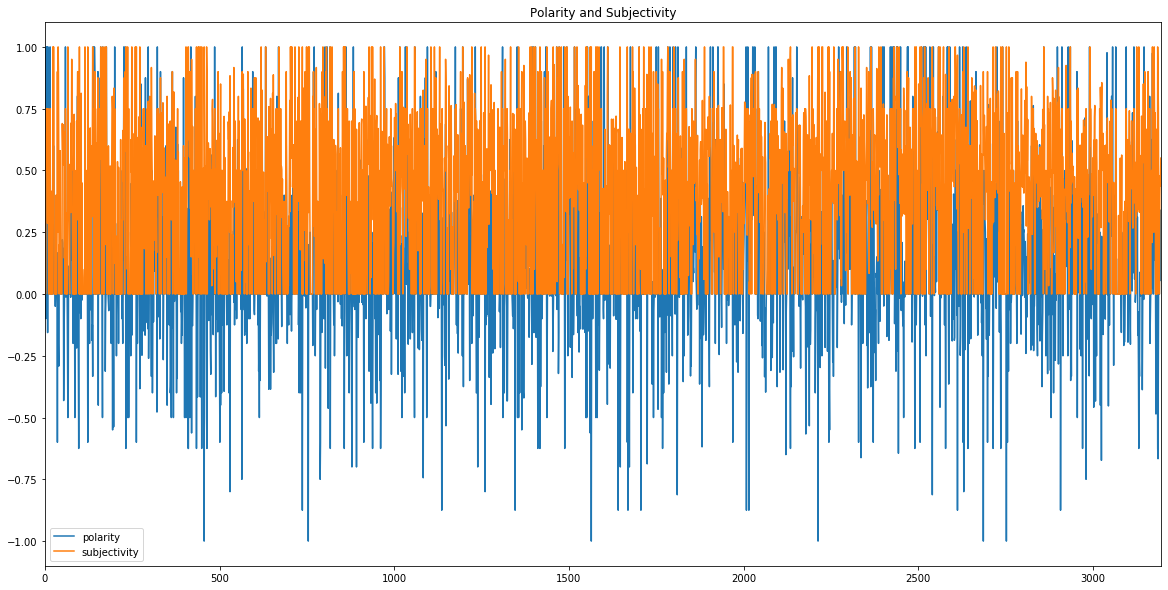

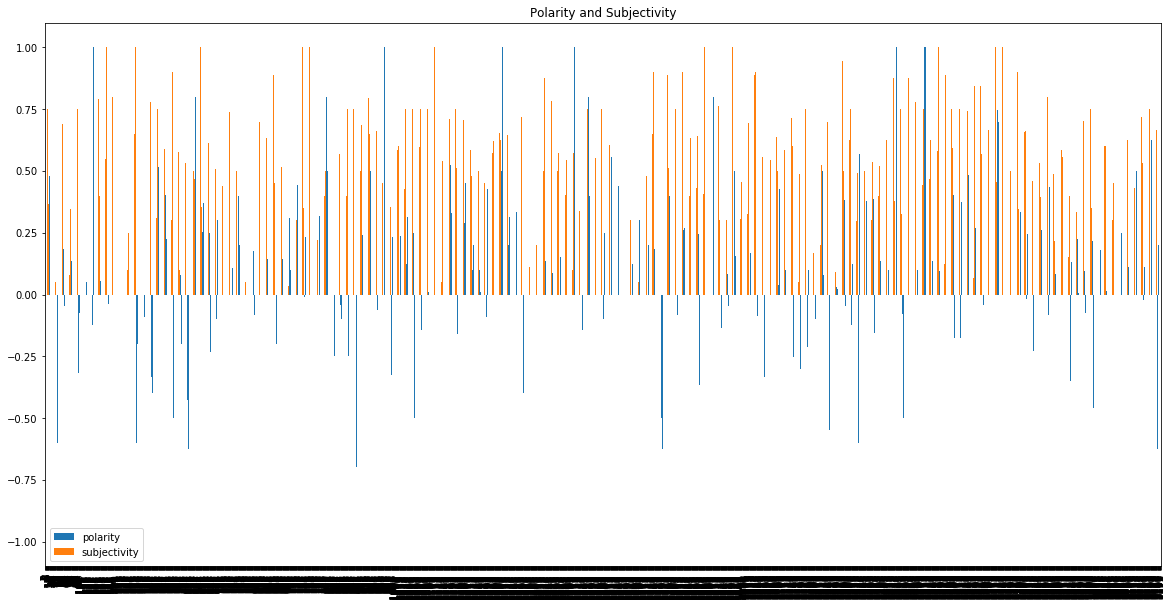

In [7]:
#Plot the line graph
polsubj.plot(title='Polarity and Subjectivity',figsize=(20,10))
polsubj.plot(kind='bar',title='Polarity and Subjectivity',figsize=(20,10))

In [8]:
dtrump_tweets=df[['full_text','created_at','retweet_count','favorite_count','retweeted']]

In [9]:
dtrump_tweets.tail()

,full_text,created_at,retweet_count,favorite_count,retweeted
3190,....Fed: There is almost no inflation!,Fri Jul 19 13:42:16 +0000 2019,9441,48145,False
3191,....but it is no thanks to the Federal Reserve...,Fri Jul 19 13:38:21 +0000 2019,11264,59320,False
3192,I like New York Fed President John Williams fi...,Fri Jul 19 13:38:21 +0000 2019,12376,65287,False
3193,Because of the faulty thought process we have ...,Fri Jul 19 12:43:05 +0000 2019,14904,63707,False
3194,....Governor of the State did a good job. Tha...,Fri Jul 19 12:34:52 +0000 2019,13366,78483,False


In [10]:
# splitting the created at column into month, weekday, and hour
dtrump_tweets['Month'] = pd.to_datetime(dtrump_tweets['created_at']).dt.month
dtrump_tweets['Weekday'] = pd.to_datetime(dtrump_tweets['created_at']).dt.weekday # 0=Monday, 1=Tuesday, etc.
dtrump_tweets['Hour'] = pd.to_datetime(dtrump_tweets['created_at']).dt.hour
dtrump_tweets.head()

/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour
0,RT @EddieRispone: 🚨8 HOURS UNTIL THE POLLS CLO...,Sat Nov 16 19:16:17 +0000 2019,4914,0,False,11,5,19
1,True! https://t.co/ySWZMUnQfd,Sat Nov 16 18:48:46 +0000 2019,8609,26776,False,11,5,18
2,RT @LouDobbs: No Quid without a Quo: @KimStras...,Sat Nov 16 18:46:38 +0000 2019,5285,0,False,11,5,18
3,RT @KimStrassel: Impeachment is meant to be a ...,Sat Nov 16 18:44:38 +0000 2019,7186,0,False,11,5,18
4,Congratulations Kimberley. Great book! https:/...,Sat Nov 16 18:44:16 +0000 2019,4911,18772,False,11,5,18


In [11]:
# most liked tweet

fav_max = np.max(dtrump_tweets['favorite_count'])

fav = dtrump_tweets[dtrump_tweets.favorite_count == fav_max].index[0]

print("The tweet with most likes/favourite counts is: \n{}".format(dtrump_tweets['full_text'][fav]))
print("Number of likes: {}".format(fav_max))

The tweet with most likes/favourite counts is: 
A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
Number of likes: 867578


In [12]:
# second highest liked
fav2 = dtrump_tweets['favorite_count'].nlargest(2)
second_fav=fav2.iloc[1]
second_favtweet=fav2.index.values[1]
print("The tweet with most likes/favourite counts is: \n{}".format(dtrump_tweets['full_text'][second_favtweet]))
print("Number of likes: {}".format(second_fav))

The tweet with most likes/favourite counts is: 
Just spoke to @KanyeWest about his friend A$AP Rocky’s incarceration. I will be calling the very talented Prime Minister of Sweden to see what we can do about helping A$AP Rocky. So many people would like to see this quickly resolved!
Number of likes: 726091


In [13]:
# most retweeted
rt_max  = np.max(dtrump_tweets['retweet_count'])
rt = dtrump_tweets[dtrump_tweets.retweet_count == rt_max].index[0]

print("The tweet with most retweets is: \n{}".format(dtrump_tweets['full_text'][rt]))
print("Number of retweets: {}".format(rt_max))


The tweet with most retweets is: 
A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
Number of retweets: 244794


In [14]:
# Analyzing sentiment for a single string
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import twitter_samples
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.sentiment.util.demo_vader_instance('A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aesha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.127, 'neu': 0.775, 'pos': 0.099, 'compound': -0.2003}


The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).

positive sentiment : (compound score >= 0.05)
neutral sentiment : (compound score > -0.05) and (compound score < 0.05)
negative sentiment : (compound score <= -0.05)

In [15]:
# Analyzing the overall sentiment of all the 'full_text' fields in the tweet data
text_array= dtrump_tweets[['full_text']].as_matrix()
strings = str(text_array)
len(strings) #876
nltk.sentiment.util.demo_vader_instance(strings)

{'neg': 0.079, 'neu': 0.809, 'pos': 0.112, 'compound': 0.831}


/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [16]:
# Finding the sentiment for each tweet
# This will take atleast 30 mins 
from nltk import sentiment
from nltk.corpus import stopwords
nltk.download('opinion_lexicon')
stop = stopwords.words('english')
dtrump_tweets['Sentiment'] = (dtrump_tweets['full_text'].apply(nltk.sentiment.util.demo_liu_hu_lexicon))

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/aesha/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


Neutral
Neutral
Neutral
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Negative
Neutral
Neutral
Positive
Neutral
Negative
Neutral
Negative
Negative
Neutral
Positive
Neutral
Neutral
Positive
Positive
Neutral
Negative
Positive
Negative
Neutral
Neutral
Neutral
Negative
Positive
Negative
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Positive
Negative
Negative
Negative
Neutral
Positive
Neutral
Positive
Neutral
Neutral
Negative
Positive
Neutral
Negative
Negative
Negative
Negative
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Negative
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Positive
Positive
Positive
Negative
Negative
Neutral
Negative
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Ne

Negative
Neutral
Negative
Negative
Neutral
Positive
Positive
Negative
Positive
Neutral
Negative
Positive
Neutral
Positive
Negative
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Positive
Positive
Negative
Positive
Positive
Positive
Neutral
Neutral
Positive
Positive
Negative
Negative
Neutral
Positive
Positive
Negative
Neutral
Positive
Positive
Negative
Positive
Negative
Negative
Positive
Negative
Negative
Negative
Positive
Neutral
Positive
Neutral
Positive
Positive
Positive
Neutral
Negative
Positive
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Negative
Neutral
Neutral
Positive
Negative
Negative
Negative
Positive
Neutral
Neutral
Positive
Negative
Negative
Negative
Neutral
Positive
Neutral
Neutral
Negative
Positive
Positive
Positive
Positive
Negative
Neutral
Negative
Positive
Negative
Positive
Negative
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Neutral
Negative
Positive
Positive
Positive
Neutral
Neutral
Neutra

Positive
Negative
Positive
Neutral
Neutral
Negative
Negative
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Neutral
Positive
Neutral
Neutral
Neutral
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Positive
Positive
Neutral
Positive
Negative
Negative
Negative
Negative
Positive
Negative
Positive
Neutral
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Negative
Positive
Positive
Neutral
Positive
Negative
Negative
Negative
Neutral
Positive
Positive
Neutral
Neutral
Neutral
Positive
Positive
Positive
Positive
Negative
Neutral
Neutral
Negative
Positive
Positive
Neutral
Positive
Positive
Neutral
Neutral
Negative
Positive
Negative
Negative
Negative
Neutral
Neutral
Neutral
Positive
Positive
Neutral
Positive
Neutral
Negative
Neutral
Positive
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Positive
Negative
Positive
Neut

Neutral
Positive
Positive
Positive
Negative
Negative
Positive
Positive
Neutral
Negative
Positive
Positive
Negative
Positive
Positive
Positive
Negative
Positive
Negative
Negative
Negative
Neutral
Positive
Positive
Neutral
Positive
Positive
Positive
Negative
Negative
Positive
Neutral
Positive
Positive
Negative
Negative
Negative
Negative
Negative
Negative
Positive
Negative
Neutral
Negative
Negative
Positive
Positive
Positive
Positive
Negative
Positive
Negative
Positive
Neutral
Negative
Neutral
Negative
Positive
Neutral
Positive
Neutral
Negative
Positive
Positive
Positive
Negative
Negative
Positive
Negative
Negative
Neutral
Negative
Positive
Positive
Positive
Positive
Neutral
Positive
Neutral
Negative
Neutral
Neutral
Negative
Neutral
Positive
Positive
Positive
Positive
Positive
Positive
Neutral
Negative
Neutral
Positive
Positive
Negative
Neutral
Positive
Negative
Positive
Neutral
Negative
Negative
Negative
Positive
Neutral
Positive
Positive
Negative
Positive
Neutral
Positive
Positive
Negat

/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
# export the file as csv to local computer and copy the above result to its SA column
dtrump_tweets.to_csv(r'/Users/aesha/Desktop/MITA/MITA Sem_2/BAP/dtrump_tweets.csv')


In [18]:
dftrump_tweets_sentiment= pd.read_csv('/Users/aesha/Desktop/MITA/Sentiment Analysis/dtrump_tweets.csv')
dftrump_tweets_sentiment.head(5)

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment
0,0,RT @EddieRispone: 🚨8 HOURS UNTIL THE POLLS CLO...,Sat Nov 16 19:16:17 +0000 2019,4914,0,False,11,5,19,Neutral
1,1,True! https://t.co/ySWZMUnQfd,Sat Nov 16 18:48:46 +0000 2019,8609,26776,False,11,5,18,Neutral
2,2,RT @LouDobbs: No Quid without a Quo: @KimStras...,Sat Nov 16 18:46:38 +0000 2019,5285,0,False,11,5,18,Neutral
3,3,RT @KimStrassel: Impeachment is meant to be a ...,Sat Nov 16 18:44:38 +0000 2019,7186,0,False,11,5,18,Positive
4,4,Congratulations Kimberley. Great book! https:/...,Sat Nov 16 18:44:16 +0000 2019,4911,18772,False,11,5,18,Positive


In [19]:
# counting the number of tweets in each sentiment
dftrump_tweets_sentiment.Sentiment.value_counts()

Positive    1262
Neutral     1021
Negative     912
Name: Sentiment, dtype: int64

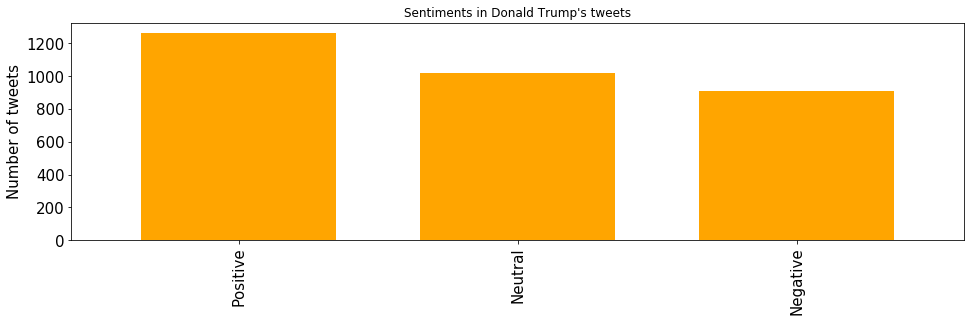

In [20]:
# plot the sentiments on a bar graph
pd.Series(dftrump_tweets_sentiment["Sentiment"]).value_counts().plot(kind = "bar", width=0.7,
                        figsize=(16,4),fontsize=15, color='orange', title = "Sentiments in Donald Trump's tweets")
plt.ylabel('Number of tweets', fontsize=15);
plt.show()

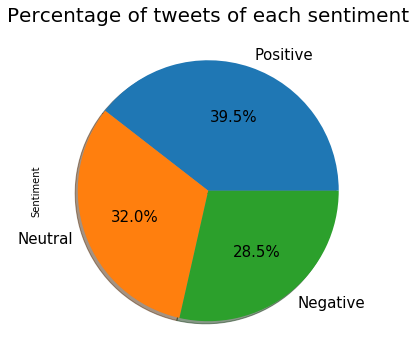

In [21]:
# plot the sentiments on a pie chart and show percentage value
pd.Series(dftrump_tweets_sentiment["Sentiment"]).value_counts().plot(kind="pie",labels=["Positive", "Neutral",  "Negative"],
    shadow=True,autopct='%.1f%%', fontsize=15,figsize=(6, 6))
plt.title("Percentage of tweets of each sentiment", fontsize=20);
plt.show()

### Top 5 tweets from all three sentiments

In [22]:
# Positive
positive_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Positive'" )
Top_Pos = positive_tweets.sort_values("favorite_count", ascending=False)
Top_Pos['full_text'].head()

3182    Just spoke to @KanyeWest about his friend A$AP...
621     We have declassified a picture of the wonderfu...
538                AMERICAN HERO! https://t.co/XCCa2sGfsZ
2589    I promise not to do this to Greenland! https:/...
2618                            MAKE AMERICA GREAT AGAIN!
Name: full_text, dtype: object

In [23]:
# Negative
positive_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Negative'" )
Top_Pos = positive_tweets.sort_values("favorite_count", ascending=False)
Top_Pos['full_text'].head()

2902    A$AP Rocky released from prison and on his way...
3046    Give A$AP Rocky his FREEDOM. We do so much for...
464     You can’t Impeach someone who hasn’t done anyt...
1606     I AM DRAINING THE SWAMP! https://t.co/U7WxKrO6Kx
1719                             PRESIDENTIAL HARASSMENT!
Name: full_text, dtype: object

In [24]:
# Neutral
positive_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Neutral'" )
Top_Pos = positive_tweets.sort_values("favorite_count", ascending=False)
Top_Pos['full_text'].head()

1447     LOOK AT THIS PHOTOGRAPH! https://t.co/QQYTqG4KTt
633                 Something very big has just happened!
570     Just confirmed that Abu Bakr al-Baghdadi’s num...
1591    They are trying to stop ME, because I am fight...
476     ISIS has a new leader. We know exactly who he is!
Name: full_text, dtype: object

### Sentiment at the hour of the day

In [25]:
#Hour of day vs sentiment
hour_of_day =pd.crosstab(dftrump_tweets_sentiment.Hour, dftrump_tweets_sentiment.Sentiment)
hour_of_day

Sentiment,Negative,Neutral,Positive
Hour,,,
0,41,34,52
1,36,35,52
2,46,68,51
3,59,77,80
4,23,42,42
5,6,12,7
6,1,3,5
8,0,0,2
9,1,0,2


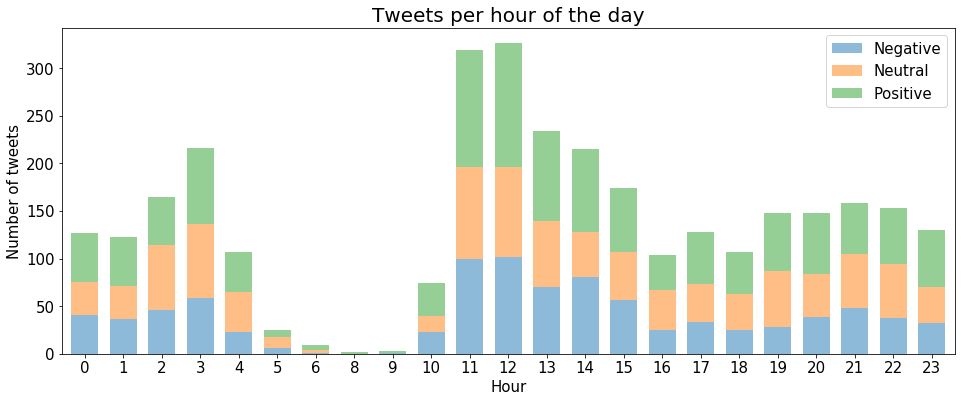

In [26]:
pd.crosstab(index = dftrump_tweets_sentiment["Hour"],columns = dftrump_tweets_sentiment["Sentiment"]).plot(kind='bar',fontsize=15,
                figsize=(16, 6),alpha=0.5,rot=0,width=0.7, stacked=True,title="Tweets per hour of the day")
plt.title("Tweets per hour of the day", fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of tweets', fontsize=15)
plt.legend(fontsize=15);
plt.show()

In [27]:
#Taking a closer look at the tweets around 12 pm
twelve_pm =pd.crosstab(dftrump_tweets_sentiment.Hour==12, dftrump_tweets_sentiment.Sentiment)
twelve_pm

Sentiment,Negative,Neutral,Positive
Hour,,,
False,810,927,1132
True,102,94,130


In [28]:
#Weekday vs sentiment
day_of_week =pd.crosstab(dftrump_tweets_sentiment.Weekday, dftrump_tweets_sentiment.Sentiment)
day_of_week

Sentiment,Negative,Neutral,Positive
Weekday,,,
0,124,120,165
1,141,123,198
2,136,163,206
3,125,136,173
4,117,159,173
5,137,192,207
6,132,128,140


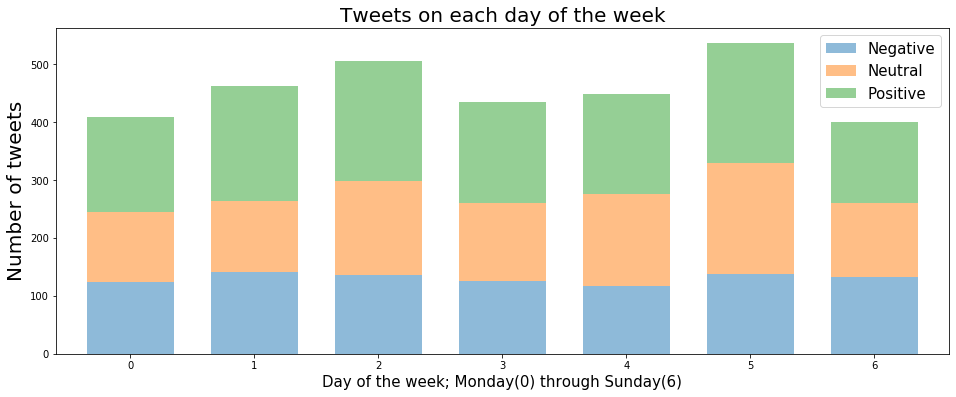

In [29]:
pd.crosstab(index = dftrump_tweets_sentiment["Weekday"],columns = dftrump_tweets_sentiment["Sentiment"]).plot(kind='bar',
                figsize=(16, 6),alpha=0.5,rot=0,width=0.7,stacked=True)
plt.title("Tweets on each day of the week", fontsize=20)
plt.xlabel('Day of the week; Monday(0) through Sunday(6)', fontsize=15)

plt.ylabel('Number of tweets', fontsize=20)
plt.legend(fontsize=15);
plt.show()

#### Lemmatization : Stemming and lemmatization both reduces inflectional forms and sometimes derivationally related forms of a word to a common base form. 
For instance:
am, are, is = be
| car, cars, car’s, cars’ = car

In [30]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [31]:
from textblob import Word

dftrump_tweets_sentiment['lemmatized_text'] = dftrump_tweets_sentiment['full_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dftrump_tweets_sentiment['lemmatized_text'].tail()


3190               ....Fed: There is almost no inflation!
3191    ....but it is no thanks to the Federal Reserve...
3192    I like New York Fed President John Williams fi...
3193    Because of the faulty thought process we have ...
3194    ....Governor of the State did a good job. That...
Name: lemmatized_text, dtype: object

In [32]:
dftrump_tweets_sentiment.head()

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment,lemmatized_text
0,0,RT @EddieRispone: 🚨8 HOURS UNTIL THE POLLS CLO...,Sat Nov 16 19:16:17 +0000 2019,4914,0,False,11,5,19,Neutral,RT @EddieRispone: 🚨8 HOURS UNTIL THE POLLS CLO...
1,1,True! https://t.co/ySWZMUnQfd,Sat Nov 16 18:48:46 +0000 2019,8609,26776,False,11,5,18,Neutral,True! https://t.co/ySWZMUnQfd
2,2,RT @LouDobbs: No Quid without a Quo: @KimStras...,Sat Nov 16 18:46:38 +0000 2019,5285,0,False,11,5,18,Neutral,RT @LouDobbs: No Quid without a Quo: @KimStras...
3,3,RT @KimStrassel: Impeachment is meant to be a ...,Sat Nov 16 18:44:38 +0000 2019,7186,0,False,11,5,18,Positive,RT @KimStrassel: Impeachment is meant to be a ...
4,4,Congratulations Kimberley. Great book! https:/...,Sat Nov 16 18:44:16 +0000 2019,4911,18772,False,11,5,18,Positive,Congratulations Kimberley. Great book! https:/...


In [33]:
# using word cloud for visualization
! pip install wordcloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
stop =stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/aesha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
dftrump_tweets_sentiment['lemmatized_text'] = dftrump_tweets_sentiment['lemmatized_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dftrump_tweets_sentiment['lemmatized_text'].tail()

3190                     ....Fed: There almost inflation!
3191    ....but thanks Federal Reserve. Had acted fast...
3192    I like New York Fed President John Williams fi...
3193    Because faulty thought process going u Federal...
3194    ....Governor State good job. That may true cou...
Name: lemmatized_text, dtype: object

### Word Cloud

In [35]:
# removing stop words 
dftrump_tweets_sentiment['lemmatized_text'] = dftrump_tweets_sentiment['lemmatized_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
dftrump_tweets_sentiment['lemmatized_text'].tail()

3190                     ....Fed: There almost inflation!
3191    ....but thanks Federal Reserve. Had acted fast...
3192    I like New York Fed President John Williams fi...
3193    Because faulty thought process going u Federal...
3194    ....Governor State good job. That may true cou...
Name: lemmatized_text, dtype: object

In [36]:
text_array = dftrump_tweets_sentiment['lemmatized_text'].as_matrix().tolist()
strings = ''.join(text_array)


/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [37]:
# removing https//: and http//:
import re
def clean_tweet(strings):
    tweet = re.sub('http\S+\s*', '', strings)  # remove URLs; http, https,... # 
    return tweet

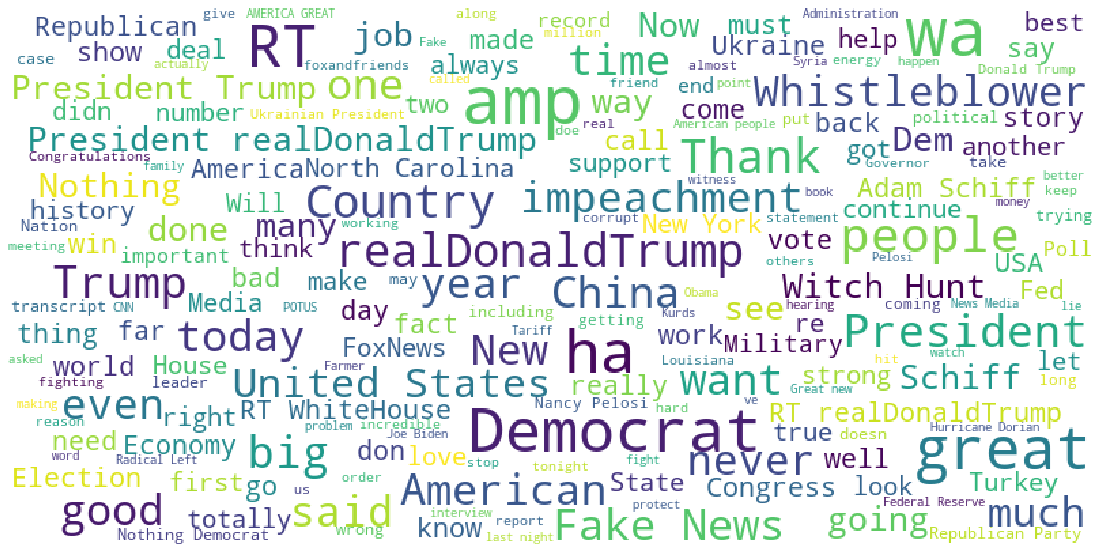

In [38]:
cloud = WordCloud(background_color="white", random_state=42, width=800, height=400, max_words=200, prefer_horizontal=1.0,font_step
=1 ,                        max_font_size=50,).generate(clean_tweet(strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Separating the tweets into three dataframes based on their sentiment; Neutral, Positive and Negative

#### Neutral Tweets

In [39]:
neutral_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Neutral'" )
len(neutral_tweets)

1021

In [40]:
neutral_favorite_sorted = neutral_tweets.sort_values("favorite_count", ascending=False)
neutral_favorite_sorted.head(5)

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment,lemmatized_text
1447,1447,LOOK AT THIS PHOTOGRAPH! https://t.co/QQYTqG4KTt,Wed Oct 02 21:06:36 +0000 2019,119212,414542,False,10,2,21,Neutral,LOOK AT THIS PHOTOGRAPH! https://t.co/QQYTqG4KTt
633,633,Something very big has just happened!,Sun Oct 27 01:23:39 +0000 2019,74970,369448,False,10,6,1,Neutral,Something big ha happened!
570,570,Just confirmed that Abu Bakr al-Baghdadi’s num...,Tue Oct 29 13:29:44 +0000 2019,51664,252134,False,10,1,13,Neutral,Just confirmed Abu Bakr al-Baghdadi’s number o...
1591,1591,"They are trying to stop ME, because I am fight...",Sat Sep 28 21:14:45 +0000 2019,71601,250953,False,9,5,21,Neutral,"They trying stop ME, I fighting YOU! https://t..."
476,476,ISIS has a new leader. We know exactly who he is!,Fri Nov 01 13:38:39 +0000 2019,42173,245009,False,11,4,13,Neutral,ISIS ha new leader. We know exactly is!


In [41]:
neutral_retweet_sorted = neutral_tweets.sort_values("retweet_count", ascending=False)
neutral_retweet_sorted.head(5)

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment,lemmatized_text
3175,3175,RT @realDonaldTrump: Just spoke to @KanyeWest ...,Sat Jul 20 11:02:22 +0000 2019,199389,0,False,7,5,11,Neutral,RT @realDonaldTrump: Just spoke @KanyeWest fri...
1447,1447,LOOK AT THIS PHOTOGRAPH! https://t.co/QQYTqG4KTt,Wed Oct 02 21:06:36 +0000 2019,119212,414542,False,10,2,21,Neutral,LOOK AT THIS PHOTOGRAPH! https://t.co/QQYTqG4KTt
2605,2605,RT @OliverMcGee: Wow. Throwback to when Senato...,Mon Aug 19 03:25:20 +0000 2019,91043,0,False,8,0,3,Neutral,RT @OliverMcGee: Wow. Throwback Senator Barack...
633,633,Something very big has just happened!,Sun Oct 27 01:23:39 +0000 2019,74970,369448,False,10,6,1,Neutral,Something big ha happened!
1591,1591,"They are trying to stop ME, because I am fight...",Sat Sep 28 21:14:45 +0000 2019,71601,250953,False,9,5,21,Neutral,"They trying stop ME, I fighting YOU! https://t..."


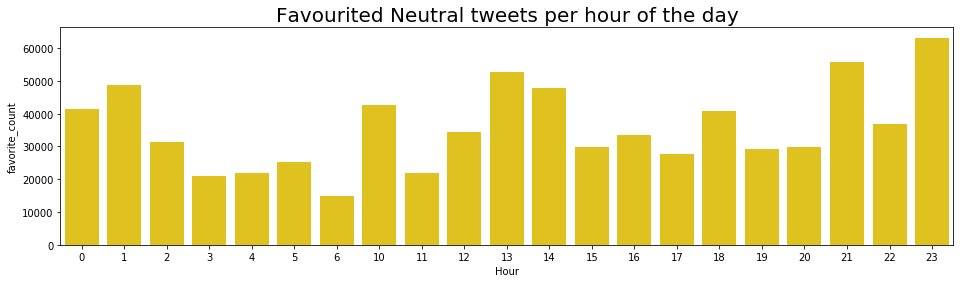

In [42]:
import seaborn as sns
f, ax = plt.subplots(figsize=(16, 4))
plt.title("Favourited Neutral tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count',  data=neutral_favorite_sorted,color='gold', ci=None);
plt.show()

In [43]:
neutral_array = neutral_tweets['lemmatized_text'].as_matrix().tolist()
neutral_strings = ''.join(neutral_array)

/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [44]:
import re
def clean_tweet(neutral_strings):
    tweet = re.sub('http\S+\s*' , '', neutral_strings)  # remove URLs; http, https,...
    
    return tweet 
#print(clean_tweet(neutral_strings))

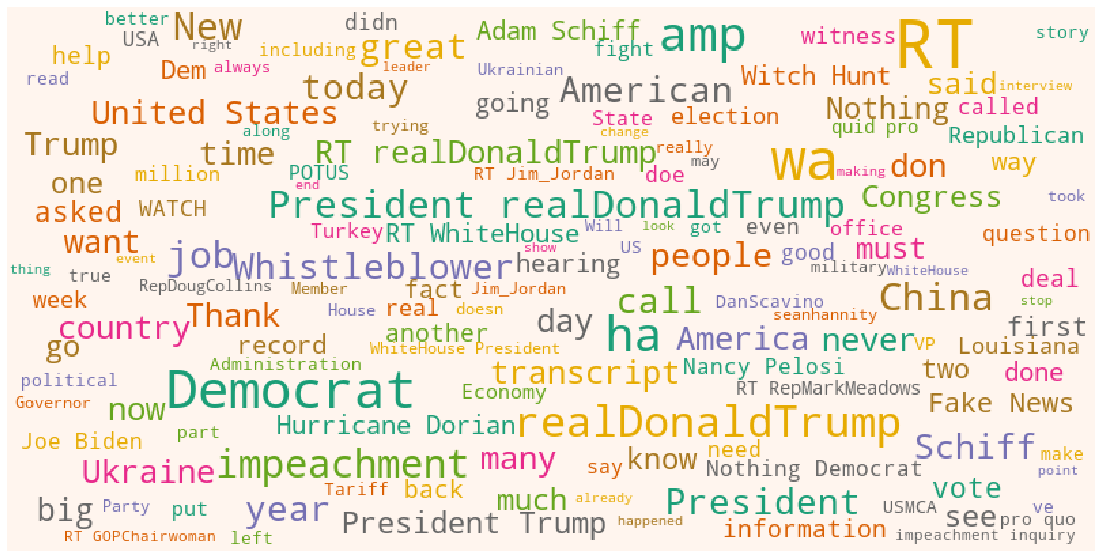

In [45]:
cloud = WordCloud(background_color="seashell", random_state=42, width=800, height=400, max_words=150, colormap='Dark2',prefer_horizontal=1.0,
                          max_font_size=50,).generate(clean_tweet(neutral_strings))
# own_palette_1= ["g",
plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### Positive Tweets

In [46]:
positive_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Positive'" )
len(positive_tweets)

1262

In [47]:
positive_favorite_sorted = positive_tweets.sort_values("favorite_count", ascending=False)
positive_favorite_sorted.head(5)

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment,lemmatized_text
3182,3182,Just spoke to @KanyeWest about his friend A$AP...,Fri Jul 19 20:01:47 +0000 2019,199389,726091,False,7,4,20,Positive,Just spoke @KanyeWest friend A$AP Rocky’s inca...
621,621,We have declassified a picture of the wonderfu...,Mon Oct 28 20:02:56 +0000 2019,130715,573357,False,10,0,20,Positive,We declassified picture wonderful dog (name de...
538,538,AMERICAN HERO! https://t.co/XCCa2sGfsZ,Wed Oct 30 17:54:14 +0000 2019,87551,442436,False,10,2,17,Positive,AMERICAN HERO! https://t.co/XCCa2sGfsZ
2589,2589,I promise not to do this to Greenland! https:/...,Tue Aug 20 00:07:14 +0000 2019,68144,307661,False,8,1,0,Positive,I promise Greenland! https://t.co/03DdyVU6HA
2618,2618,MAKE AMERICA GREAT AGAIN!,Sun Aug 18 12:34:53 +0000 2019,45438,250110,False,8,6,12,Positive,MAKE AMERICA GREAT AGAIN!


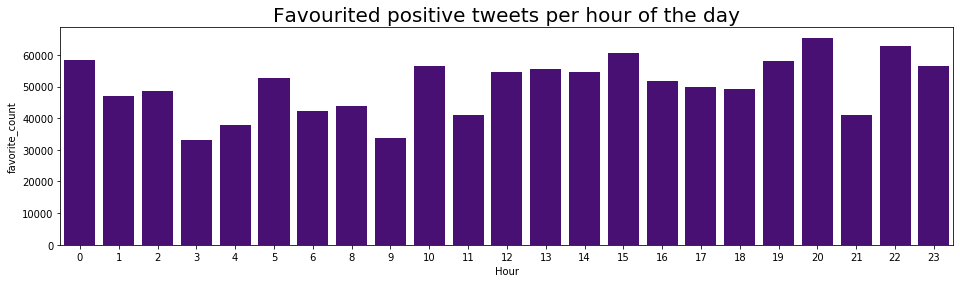

In [48]:
f, ax = plt.subplots(figsize=(16, 4))
plt.title("Favourited positive tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count', color='indigo', data=positive_favorite_sorted, ci=None);
plt.show()

In [49]:
positive_array = positive_tweets['lemmatized_text'].as_matrix().tolist()
positive_strings = ''.join(positive_array)

/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [50]:
import re
def clean_tweet(positive_strings):
    tweet = re.sub('http\S+\s*', '', positive_strings)  # remove URLs; http, https,...
    return tweet

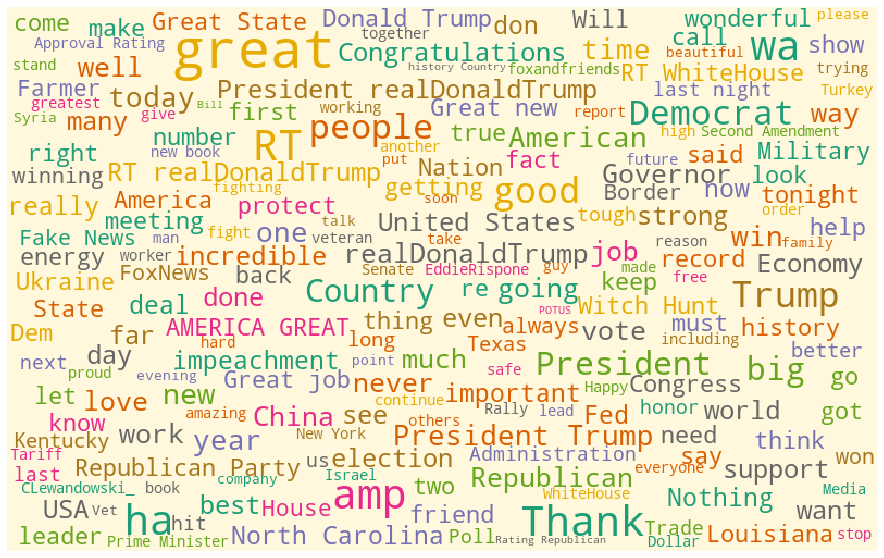

In [51]:
cloud = WordCloud(background_color="cornsilk", random_state=42, width=800, height=500, max_words=200, colormap='Dark2', color_func=None, prefer_horizontal=1.0,
                          max_font_size=50,).generate(clean_tweet(positive_strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

#### Negative Tweets

In [52]:
negative_tweets = dftrump_tweets_sentiment.query("Sentiment == 'Negative'" )
negative_tweets.head()  # length: 1457
len(negative_tweets)

912

In [53]:
negative_favorite_sorted = negative_tweets.sort_values("favorite_count", ascending=False)
negative_favorite_sorted.head(5)

,Unnamed: 0,full_text,created_at,retweet_count,favorite_count,retweeted,Month,Weekday,Hour,Sentiment,lemmatized_text
2902,2902,A$AP Rocky released from prison and on his way...,Fri Aug 02 17:41:30 +0000 2019,244794,867578,False,8,4,17,Negative,A$AP Rocky released prison way home United Sta...
3046,3046,Give A$AP Rocky his FREEDOM. We do so much for...,Thu Jul 25 21:24:21 +0000 2019,93787,328128,False,7,3,21,Negative,Give A$AP Rocky FREEDOM. We much Sweden doesn’...
464,464,You can’t Impeach someone who hasn’t done anyt...,Fri Nov 01 22:48:59 +0000 2019,52484,289783,False,11,4,22,Negative,You can’t Impeach someone hasn’t done anything...
1606,1606,I AM DRAINING THE SWAMP! https://t.co/U7WxKrO6Kx,Fri Sep 27 19:41:18 +0000 2019,97138,277436,False,9,4,19,Negative,I AM DRAINING THE SWAMP! https://t.co/U7WxKrO6Kx
1719,1719,PRESIDENTIAL HARASSMENT!,Tue Sep 24 21:17:42 +0000 2019,51831,237489,False,9,1,21,Negative,PRESIDENTIAL HARASSMENT!


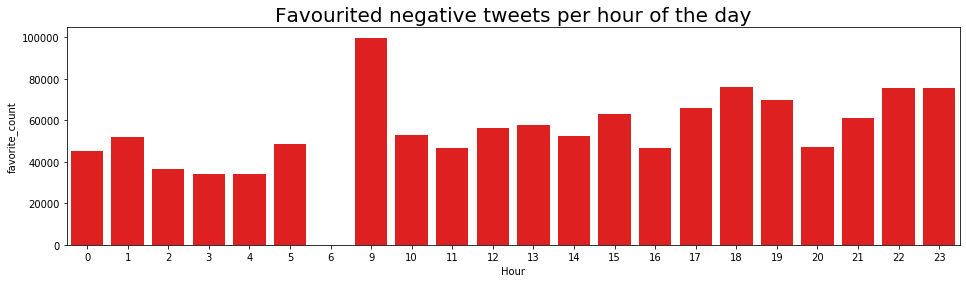

In [54]:
f, ax = plt.subplots(figsize=(16, 4))
#my_palette = sns.color_palette("Red")
plt.title("Favourited negative tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count',  data=negative_favorite_sorted,color='red', ci=None);
plt.show()

In [55]:
negative_array = negative_tweets['lemmatized_text'].as_matrix().tolist()
negative_strings = ''.join(negative_array)

/Users/aesha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [56]:
import re
def clean_tweet(negative_strings):
    tweet = re.sub('http\S+\s*', '', negative_strings)  # remove URLs; http, https,...
    return tweet

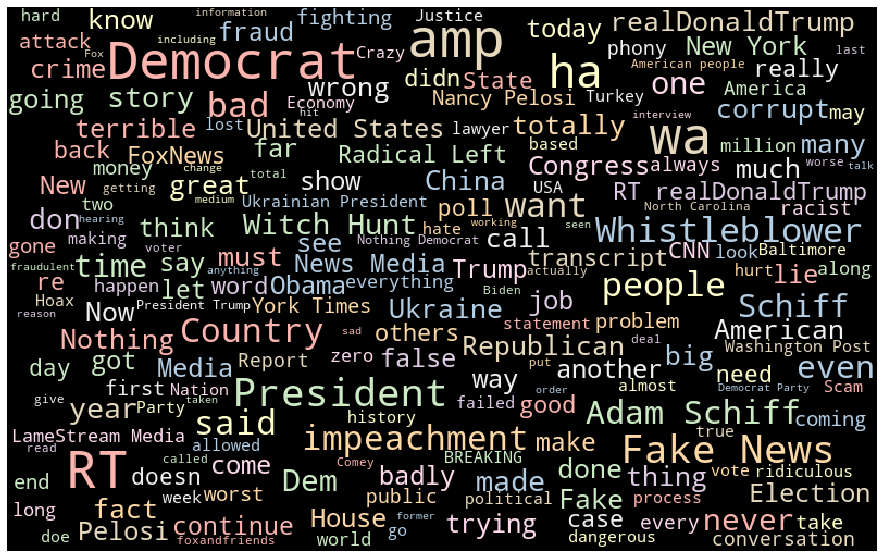

In [57]:
cloud = WordCloud(background_color="black", random_state=42, width=800, height=500, max_words=200,  prefer_horizontal=1.0,colormap='Pastel1',
                          max_font_size=50,).generate(clean_tweet(negative_strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Counting average Favourited and Retweets per each sentiment

In [58]:
#Avg Neutral Favorited
neut_avg_fav = neutral_tweets['favorite_count'].mean()
neut_avg_fav

35666.27326150832

In [59]:
#Avg Neutral Retweeted
neut_avg_rt = neutral_tweets['retweet_count'].mean()
neut_avg_rt

14526.834476003918

In [60]:
#Avg Positive Favorited
posit_avg_fav = positive_tweets['favorite_count'].mean()
posit_avg_fav

51469.853407290015

In [61]:
#Avg Positive Retweeted
posit_avg_rt = positive_tweets['retweet_count'].mean()
posit_avg_rt

15208.896988906497

In [62]:
#Avg Negative Favorited
negat_avg_fav = negative_tweets['favorite_count'].mean()
negat_avg_fav

54116.03618421053

In [63]:
#Avg Negative Retweeted
negat_avg_rt = negative_tweets['retweet_count'].mean()
negat_avg_rt

17668.46052631579

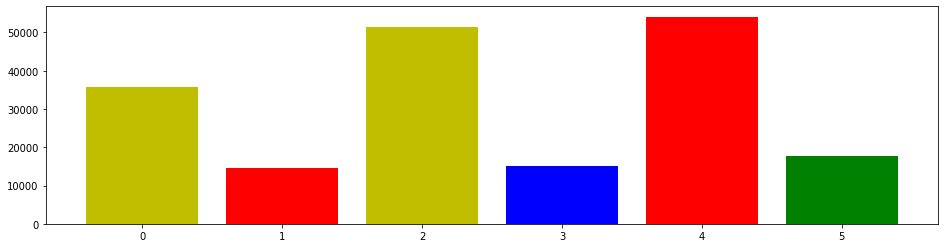

In [64]:
f, ax = plt.subplots(figsize=(16, 4))
values=[neut_avg_fav,neut_avg_rt, posit_avg_fav, posit_avg_rt, negat_avg_fav, negat_avg_rt ]
lables=['neut_avg_fav','neut_avg_rt','posit_avg_fav','posit_avg_rt','negat_avg_fav','negat_avg_rt']
colors = ['y','r','y','b', 'r', 'g']
plt.bar(range(0,6), values, color=colors)
plt.show()